In [1]:
import pandas
import matplotlib
import numpy
import seaborn
import sklearn
import sys

print('Pandas Version: {}'.format(pandas.__version__))
print('Numpy Version: {}'.format(numpy.__version__))
print('matplotlib Version: {}'.format(matplotlib.__version__))
print('Seaborn Version: {}'.format(seaborn.__version__))
print('Sklearn Version: {}'.format(sklearn.__version__))
print('Python Version: {}'.format(sys.version))

Pandas Version: 0.25.1
Numpy Version: 1.17.2
matplotlib Version: 3.1.1
Seaborn Version: 0.9.0
Sklearn Version: 0.21.3
Python Version: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max.columns', None)
pd.pandas.set_option('display.max.rows', None)

In [78]:
train_data = pd.read_csv('train_v9rqX0R.csv')
test_data = pd.read_csv('test_AbJTz2l.csv')

In [79]:
train_copied = train_data.copy()

# DATASETS EXPLORATION

In [4]:
print(train_data.shape, '\n')
print(test_data.shape)

(8523, 12) 

(5681, 11)


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [9]:
# lets get the percentage of null values for train data
features_with_na = [feature for feature in train_data.columns if train_data[feature].isnull().sum() > 0]
print(features_with_na)
for feature in features_with_na:
    print(feature, np.round(train_data[feature].isnull().mean(),4), '% of missing values')

['Item_Weight', 'Outlet_Size']
Item_Weight 0.1717 % of missing values
Outlet_Size 0.2828 % of missing values


In [10]:
# lets get the percentage of null values for the test data
features_with_na_test = [feature for feature in test_data.columns if test_data[feature].isnull().sum() > 0]
print(features_with_na_test)
for feature in features_with_na_test:
    print(feature, np.round(test_data[feature].isnull().mean(),4), '% of missing values')

['Item_Weight', 'Outlet_Size']
Item_Weight 0.1718 % of missing values
Outlet_Size 0.2827 % of missing values


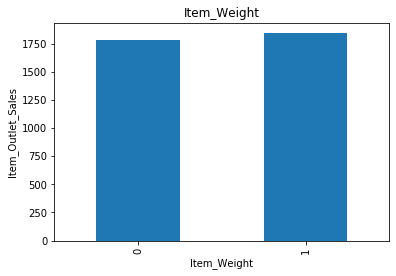

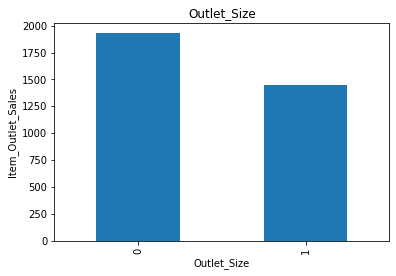

In [11]:
# FIND THE RELATIONSHIP BETWEEN features with NaN values with the Item Outlet Sales
for feature in features_with_na:
    dataset = train_data.copy()
    dataset[feature] = np.where(dataset[feature].isnull(), 1, 0)
    #plot a graph showing the estimated median values of the null values 
    #in comparison withI tem Outlet Sales
    dataset.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

In [12]:
# numerical feature exploration
numerical_features = [num_feature for num_feature in train_data.columns if train_data[num_feature].dtypes !='O']
print(numerical_features,'\n')
print('there are {} total number of numerical features'.format(len(numerical_features)))

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'] 

there are 5 total number of numerical features


In [13]:
train_data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

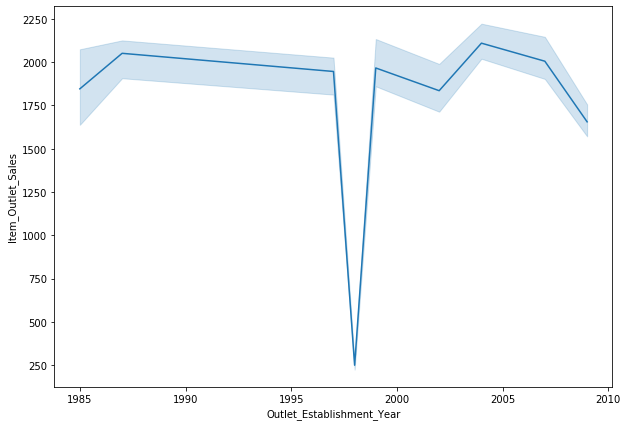

In [14]:
ax, fig= plt.subplots(figsize=(10,7))
ax = sns.lineplot(x=train_data['Outlet_Establishment_Year'], y=train_data['Item_Outlet_Sales'], estimator=np.median)
plt.show()

In [15]:
# Low Fat and low fat, LF are of the same category. Likewise Regular and reg
train_data['Item_Fat_Content'].value_counts(ascending=False)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
# replace those rows with the appropriate names
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})

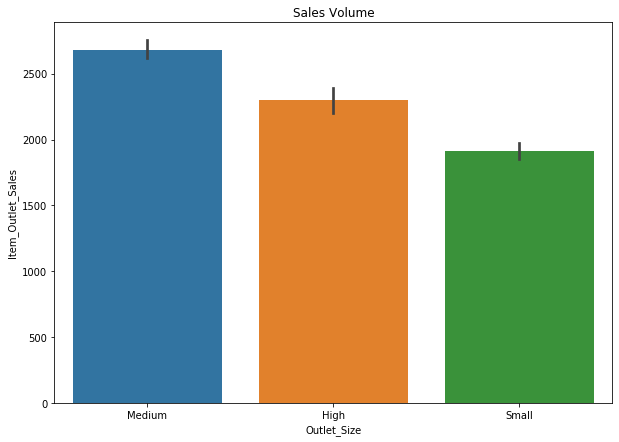

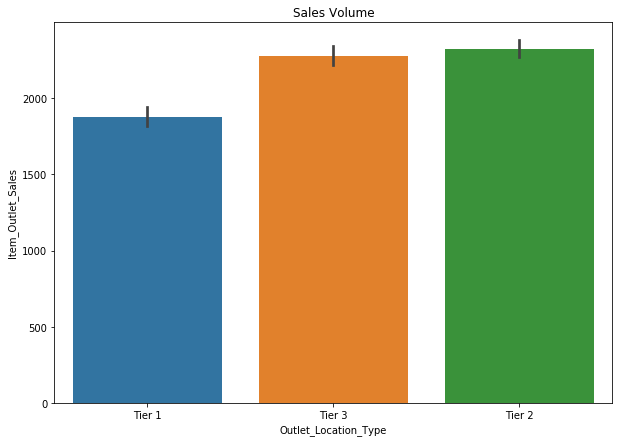

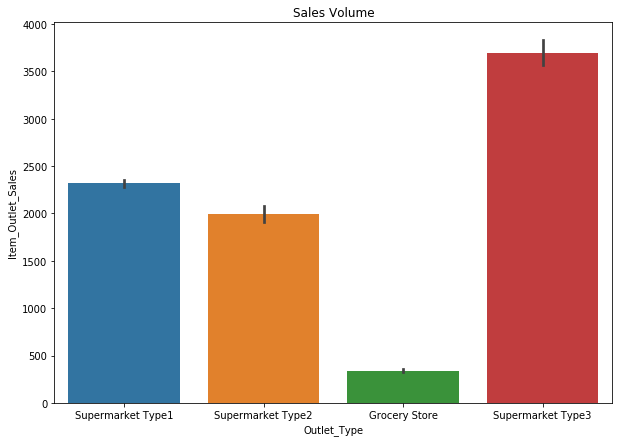

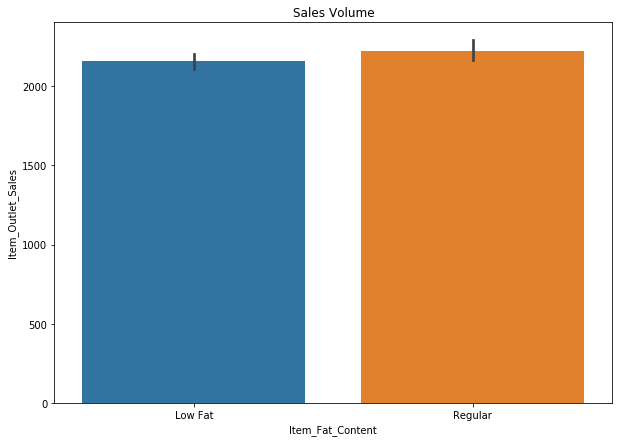

In [17]:
# compare some categorical features to the columns
# get an idea which a greater impact in sales volume
some_cat_features = ['Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Fat_Content']
for feature in some_cat_features:
    ax, fig= plt.subplots(figsize=(10,7))
    dataset = train_data.copy()
    ax = sns.barplot(x=dataset[feature], y=dataset['Item_Outlet_Sales'])
    plt.title('Sales Volume')
    plt.show()

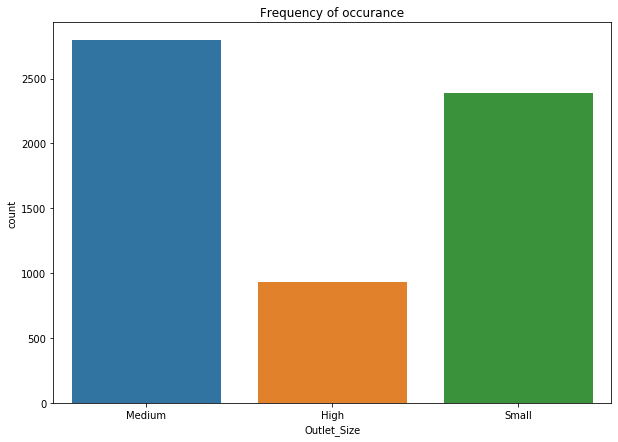

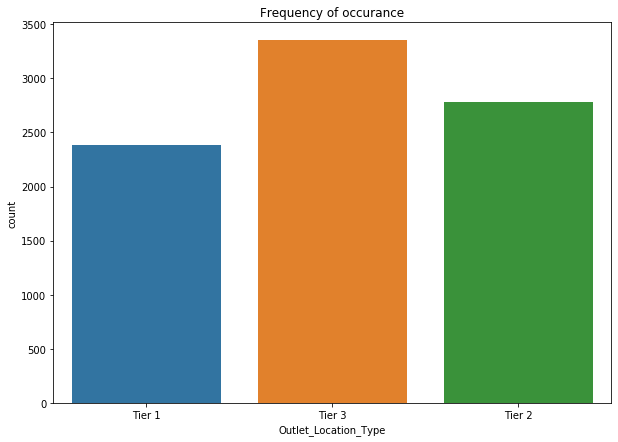

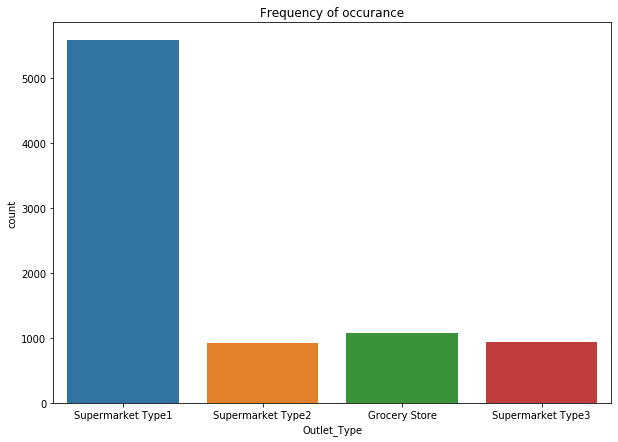

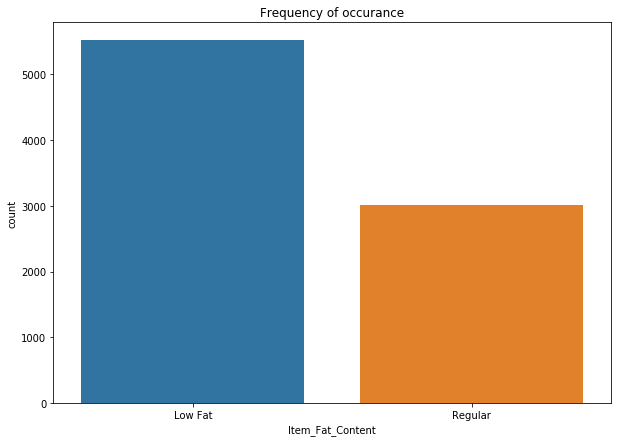

In [18]:
#Comparing all the categorical with count.
for feature in some_cat_features:
    ax, fig= plt.subplots(figsize=(10,7))
    dataset = train_data.copy()
    ax = sns.countplot(x=dataset[feature])
    plt.title('Frequency of occurance')
    plt.show()

In [19]:
train_data['Item_Type'].value_counts(ascending=False)

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

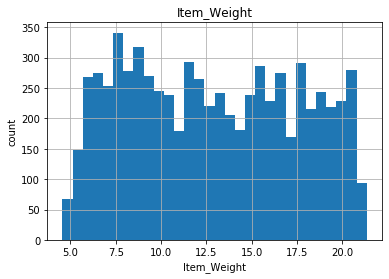

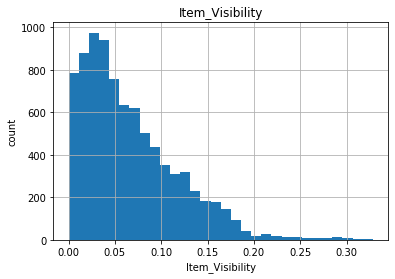

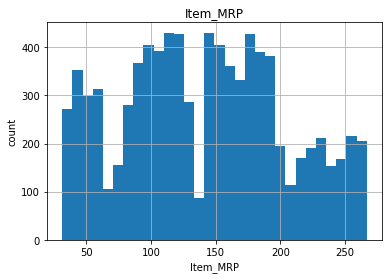

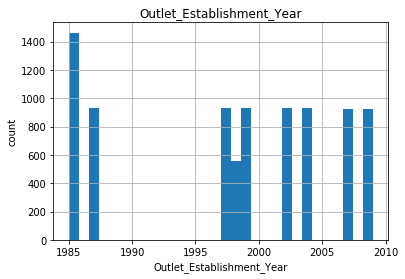

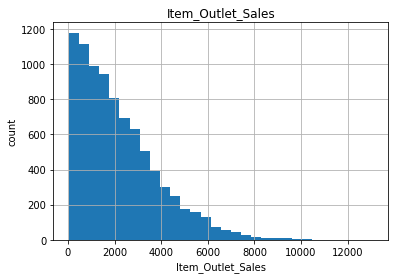

In [20]:
# plotting the graph for the numerical variables
for features in numerical_features:
    dataset = train_data.copy()
    dataset[features].hist(bins=30)
    plt.xlabel(features)
    plt.ylabel('count')
    plt.title(features)
    plt.show()

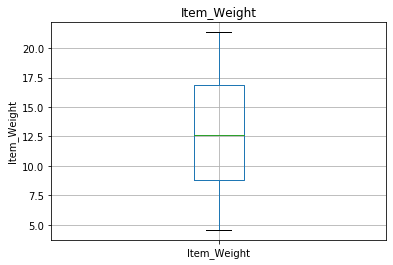

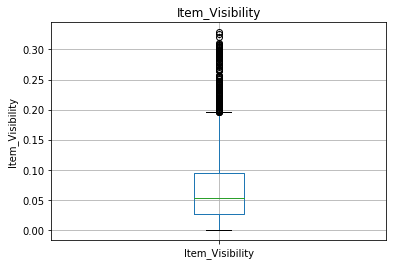

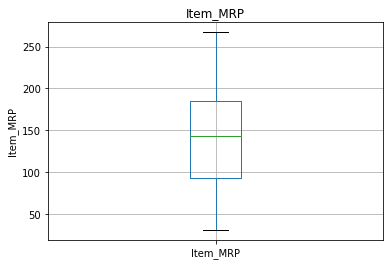

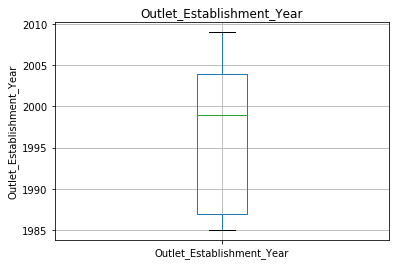

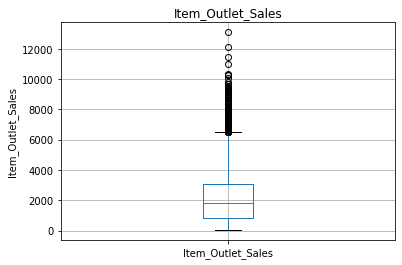

In [21]:
# CHECK FOR OUTLIERS
for features in numerical_features:
    dataset = train_data.copy()
    dataset.boxplot(column=features)
    plt.ylabel(features)
    plt.title(features)
    plt.show()

# SOME STATISTICS

In [22]:
corr = train_data.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


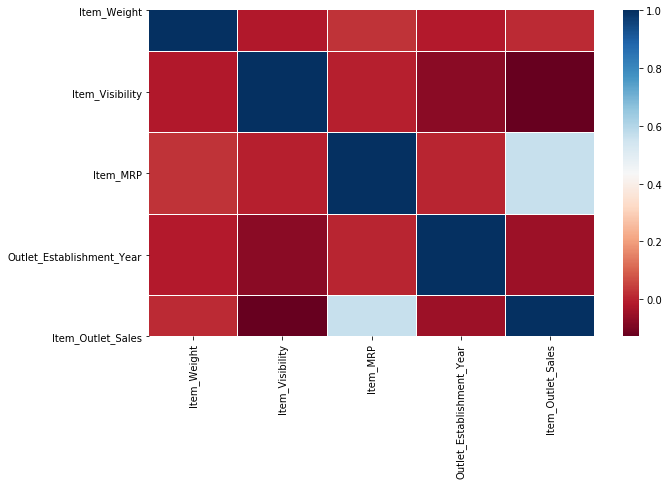

In [23]:
# plot heatmap
ax, fig = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="RdBu")

In [24]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# FEATURE ENGINEERING FOR TRAINING DATA

In [25]:
# handle categorical feature
# Filling Na with missing
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna('missing')

In [26]:
# FROM THE ITEM IDENTIFIER, there are mainly three categories
# Searcing from the first two alphabets
# we notice there is FD which stands for Food, DR which stands for drink,and NC which implies
# Non Consumerable.
# we will try to reduce the labels 
# separate them into 3 categories

# getting the first two alphabets
train_data['New_Item_Identifier'] = train_data['Item_Identifier'].apply(lambda x: x[0:2])

In [27]:
# we also observe that some non consumerable are displayed as Low fAT ON Item_Fat_Content column
# this does not make sense. If a food is non consumerable, it shouldn't be low fat
train_data.loc[train_data['New_Item_Identifier'] == 'NC', 'Item_Fat_Content'] = 'Non-Edible'

In [30]:
train_data['Item_Fat_Content'].value_counts(ascending=False)

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [29]:
train_data['New_Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: New_Item_Identifier, dtype: int64

In [31]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)

In [32]:
train_data['Item_Weight'].isnull().sum()

0

In [33]:
# handling year data variable
train_data['Number_of_Years'] = 2010 - train_data['Outlet_Establishment_Year']

In [34]:
train_data['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [35]:
# creating a new variable where those products that have a 0.0 visibility be 1 and those with more
# be 0
train_data['non_visible'] = np.where(train_data['Item_Visibility']==0, 1,0)

In [36]:
train_data['Outlet'] = train_data['Outlet_Identifier']

In [37]:
# handling rare categorical features
categorical_features = [features for features in train_data.columns if train_data[features].dtypes == 'O']
for feature in categorical_features:
    if feature not in ['Item_Identifier','Item_Type','Outlet_Identifier']:
        print(feature)

Item_Fat_Content
Outlet_Size
Outlet_Location_Type
Outlet_Type
New_Item_Identifier
Outlet


In [38]:
# converting the categorical variable into numerical variables
for feature in categorical_features:
    if feature not in ['Item_Identifier','Item_Type','Outlet_Identifier']:
        labels_ordered=train_data.groupby([feature])['Item_Outlet_Sales'].mean().sort_values().index
        labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
        train_data[feature]=train_data[feature].map(labels_ordered)

In [40]:
features = []
for feature in categorical_features:
    if feature not in ['Item_Identifier','Item_Type','Outlet_Identifier']:
        features.append(feature)
        
# convert the columns to dummy variables with each having its columns
new_dataset = pd.get_dummies(train_data, columns=features)

In [41]:
new_dataset.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Number_of_Years,non_visible,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Identifier_0,New_Item_Identifier_1,New_Item_Identifier_2,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,11,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,11,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,12,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,23,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [42]:
new_dataset.drop(columns=['Item_Type', 'Outlet_Establishment_Year'], axis=1, inplace=True)

In [43]:
new_dataset.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Number_of_Years,non_visible,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Identifier_0,New_Item_Identifier_1,New_Item_Identifier_2,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,11,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,11,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,12,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,23,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [44]:
from sklearn.model_selection import train_test_split

In [60]:
X= new_dataset.drop(columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
Y=np.log(new_dataset['Item_Outlet_Sales'])

In [61]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state= 123)

In [47]:
import xgboost as xgb
classifier = xgb.XGBRegressor(n_estimators= 1000, learning_rate=0.05)

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
classifier.fit(X_train,y_train)

/Users/kingmichael/Desktop/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:36:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [67]:
y_pred = classifier.predict(X_test)

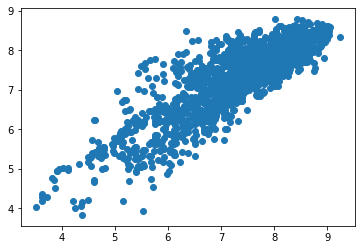

In [71]:
plt.scatter(y_test,y_pred)

In [72]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.5318609235304741


In [75]:
# converting the predicted values to its original value
predictions = np.expm1(y_pred)
y_test = np.expm1(y_test)

In [76]:
print(np.sqrt(mean_squared_error(y_test, predictions)))

1113.324150844733


In [77]:
print(r2_score(y_test,  predictions))

0.5670401228690292


# merging both train and test data 

In [80]:
# combining the train and test data
df = pd.concat([train_copied, test_data], axis=0, sort=False, ignore_index=True)

In [81]:
# check for duplicates
df[df.duplicated(keep=False)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [82]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})
df['Item_Fat_Content'].value_counts(ascending=False)

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [83]:
total_features_na = [feature for feature in df.columns if df[feature].isnull().sum()>0]
print(total_features_na)
for feature in total_features_na:
    print(feature, np.round(df[feature].isnull().mean(),4), '% of missing values')

['Item_Weight', 'Outlet_Size', 'Item_Outlet_Sales']
Item_Weight 0.1717 % of missing values
Outlet_Size 0.2827 % of missing values
Item_Outlet_Sales 0.4 % of missing values


In [84]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('missing')

In [85]:
df['New_Item_Identifier'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [86]:
df['New_Item_Identifier'].value_counts(ascending=False)

FD    10201
NC     2686
DR     1317
Name: New_Item_Identifier, dtype: int64

In [87]:
df.loc[df['New_Item_Identifier'] == 'NC', 'Item_Fat_Content'] = 'Non-Edible'

In [88]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Number_of_Years'] = 2010 - df['Outlet_Establishment_Year']

In [89]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,Number_of_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,11
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,11
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800,FD,12
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,23


In [90]:
df.loc[(df['Item_Visibility'] != 0), 'Item_Visibility'].count()

13325

In [92]:
df['visible_products'] = np.where(df['Item_Visibility']==0, 1, 0)

In [93]:
df['Outlet'] = df['Outlet_Identifier']

In [94]:
# handling rare categorical features
categorical_features = [features for features in df.columns if df[features].dtypes == 'O']
for feature in categorical_features:
    if feature not in ['Item_Identifier','Item_Type','Outlet_Identifier']:
        print(feature)

Item_Fat_Content
Outlet_Size
Outlet_Location_Type
Outlet_Type
New_Item_Identifier
Outlet


In [95]:
# converting the categorical variable into numerical variables
for feature in categorical_features:
    if feature not in ['Item_Identifier','Item_Type','Outlet_Identifier']:
        labels_ordered=df.groupby([feature])['Item_Outlet_Sales'].mean().sort_values().index
        labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
        df[feature]=df[feature].map(labels_ordered)

In [96]:
# convert the columns to dummy variables with each having its columns
features = []
for feature in categorical_features:
    if feature not in ['Item_Identifier','Item_Type','Outlet_Identifier']:
        features.append(feature)

In [97]:
dataset = pd.get_dummies(df, columns=features)

In [98]:
dataset= dataset.drop(columns=['Item_Type', 'Outlet_Establishment_Year'], axis=1)

In [99]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Number_of_Years,visible_products,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Identifier_0,New_Item_Identifier_1,New_Item_Identifier_2,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,11,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,11,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,12,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,23,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [100]:
dataset['Item_Outlet_Sales'] = np.log(dataset['Item_Outlet_Sales']+1)

In [101]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Number_of_Years,visible_products,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Identifier_0,New_Item_Identifier_1,New_Item_Identifier_2,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,8.225808,11,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,6.096776,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,7.648868,11,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,6.597664,12,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,6.903451,23,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [102]:
test = dataset.loc[dataset['Item_Outlet_Sales'].isnull()].reset_index(drop=True)
test = test.drop(columns=['Item_Identifier', 'Outlet_Identifier','Item_Outlet_Sales'], axis=1)

In [103]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Number_of_Years,visible_products,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Identifier_0,New_Item_Identifier_1,New_Item_Identifier_2,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,20.750000,0.007565,107.8622,11,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,3,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,14.600000,0.099575,241.7538,12,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,7.315000,0.015388,155.0340,3,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,12.792854,0.118599,234.2300,25,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1


In [104]:
train = dataset.loc[dataset['Item_Outlet_Sales'].notna()].reset_index(drop=True)

In [105]:
X_train = train.drop(columns=['Item_Identifier','Item_Outlet_Sales','Outlet_Identifier'], axis=1)
Y_train = train['Item_Outlet_Sales']

In [106]:
Y_train.head()

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

In [107]:
classifier.fit(X_train, Y_train)

/Users/kingmichael/Desktop/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/kingmichael/Desktop/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[16:46:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [108]:
prediction = classifier.predict(test)

In [112]:
predicted_prices= np.exp(prediction)

In [113]:
predicted_prices[0:30]

array([1438.5205 , 1299.8751 ,  544.21796, 2162.8127 , 5475.1714 ,
       1636.615  ,  564.2478 , 2088.4011 , 1018.64685, 2770.775  ,
       1652.6538 , 1225.9352 ,  517.6032 , 1917.7684 ,  682.84375,
       2100.2712 , 2662.5095 , 2595.5461 , 2649.1023 ,  455.63333,
       2644.0972 , 3425.5918 ,  685.10724,  302.8798 , 2890.2039 ,
        470.77322,  745.6518 , 2259.5251 , 3329.8784 , 2049.2485 ],
      dtype=float32)

In [115]:
classifier.score(X_train, Y_train)*100

78.73241459061474

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
lnr = LinearRegression(normalize= True)

In [118]:
lnr.fit(X_train , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [119]:
lnr.score(X_train, Y_train)*100

72.0542104998942

In [120]:
my_submission = pd.DataFrame({'Item_Identifier':test_data['Item_Identifier'],
                              'Outlet_Identifier':test_data['Outlet_Identifier'],
                              'Item_Outlet_Sales': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('LOG_submission.csv', index=False)